<a href="https://colab.research.google.com/github/riku12489520/tf.layers.conv2d/blob/main/tf_layers_conv2d_print(size).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy==1.16
!pip install tensorflow==1.15

In [ ]:
import tensorflow as tf
from tensorflow.contrib import layers
import numpy as np
img = np.random.randint(0, 255, (1, 104, 66, 32)).astype(np.float32)
img_t = tf.constant(img, tf.float32)

kernel_size=(3,3)
strides=(2,2)

conv_v = tf.layers.conv2d(inputs=img_t, filters=16, kernel_size=kernel_size, strides=strides, padding='valid')
conv_s = tf.layers.conv2d(inputs=img_t, filters=16, kernel_size=kernel_size, strides=strides, padding='same')

print('输出尺寸：', conv_v.shape)
print('输出尺寸：', conv_s.shape)

transpose_v = tf.layers.conv2d_transpose(inputs=img_t, filters=16, kernel_size=kernel_size, strides=(2, 2), padding='valid')
transpose_s = tf.layers.conv2d_transpose(inputs=img_t, filters=16, kernel_size=kernel_size, strides=(2, 2), padding='same')
print('valid 输出尺寸：', transpose_v.shape)
print('valid 输出尺寸：', transpose_s.shape)


Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
Instructions for updating:
Please use `layer.__call__` method instead.
输出尺寸： (1, 51, 32, 16)
输出尺寸： (1, 52, 33, 16)
Instructions for updating:
Use `tf.keras.layers.Conv2DTranspose` instead.
valid 输出尺寸： (1, 209, 133, 16)
valid 输出尺寸： (1, 208, 132, 16)


In [ ]:
inputs = np.random.randint(0, 255, (1, 1024, 512, 32)).astype(np.float32)
input_ = tf.constant(inputs, tf.float32)

conv_1 = tf.layers.conv2d(inputs=input_, filters=16, kernel_size=kernel_size, strides=strides, padding='same')
conv_2 = tf.layers.conv2d(inputs=conv_1, filters=16, kernel_size=kernel_size, strides=strides, padding='same')
conv_3 = tf.layers.conv2d(inputs=conv_2, filters=16, kernel_size=kernel_size, strides=strides, padding='same')
conv_4 = tf.layers.conv2d(inputs=conv_3, filters=16, kernel_size=kernel_size, strides=strides, padding='same')
conv_5 = tf.layers.conv2d(inputs=conv_4, filters=16, kernel_size=kernel_size, strides=strides, padding='same')



dconv_5 = tf.layers.conv2d_transpose(inputs=conv_5, filters=16, kernel_size=kernel_size, strides=(2, 2), padding='same')
#dconv_5_p = tf.pad(dconv_5,[[0,0],[1,0],[0,0],[0,0]])
dconv_4 = tf.layers.conv2d_transpose(inputs=dconv_5, filters=16, kernel_size=kernel_size, strides=(2, 2), padding='same')
dconv_3 = tf.layers.conv2d_transpose(inputs=dconv_4, filters=16, kernel_size=kernel_size, strides=(2, 2), padding='same')
dconv_2 = tf.layers.conv2d_transpose(inputs=dconv_3, filters=16, kernel_size=kernel_size, strides=(2, 2), padding='same')

print('conv_1：', conv_1.shape)
print('conv_2：', conv_2.shape)
print('conv_3：', conv_3.shape)
#print('p3：', p3.shape)
print('conv_4：', conv_4.shape)
print('conv_5：', conv_5.shape)

print('dconv_5：', dconv_5.shape)
#print('dconv_5_p：', dconv_5_p.shape)
print('dconv_4：', dconv_4.shape)
print('dconv_3：', dconv_3.shape)
print('dconv_2：', dconv_2.shape)



conv_1： (1, 512, 256, 16)
conv_2： (1, 256, 128, 16)
conv_3： (1, 128, 64, 16)
conv_4： (1, 64, 32, 16)
conv_5： (1, 32, 16, 16)
dconv_5： (1, 64, 32, 16)
dconv_4： (1, 128, 64, 16)
dconv_3： (1, 256, 128, 16)
dconv_2： (1, 512, 256, 16)


In [ ]:
print(dconv_2.shape[:2])

(1, 512)


In [ ]:
!wget https://www.teepr.com/wp-content/uploads/2016/04/%E9%A2%A8%E6%99%AF%E7%85%A7%E4%BF%AE%E5%9C%96-1280x720.jpg

--2020-11-23 08:38:33--  https://www.teepr.com/wp-content/uploads/2016/04/%E9%A2%A8%E6%99%AF%E7%85%A7%E4%BF%AE%E5%9C%96-1280x720.jpg
Resolving www.teepr.com (www.teepr.com)... 172.67.6.91, 104.22.10.248, 104.22.11.248
Connecting to www.teepr.com (www.teepr.com)|172.67.6.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘風景照修圖-1280x720.jpg’

風景照修圖-1280x720     [ <=>                ] 193.95K  --.-KB/s    in 0.03s   

2020-11-23 08:38:33 (6.17 MB/s) - ‘風景照修圖-1280x720.jpg’ saved [198604]



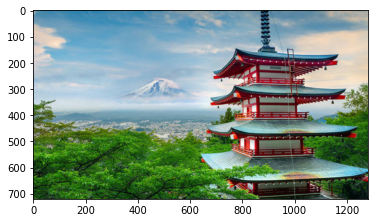

(720, 1280, 3)


In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('veiw.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

print(img.shape)

In [ ]:
import random
import numpy as np
import cv2

def random_crop_corner(image, size=512):
    
    image = resize_image(image)
    
    images = []
   
    h, w = image.shape[:2]
    
    Ys = (0, 0, h-size, h-size, int((h-size)/2))    
    Xs = (0, w-size, 0, w-size, int((h-size)/2))
    
    for y, x in zip(Ys, Xs):
        value = image[y:y+size, x:x+size, :]        
        images.append(value)
        
    return images

def resize_image(image, size=512, bias=10):
    
    image_shape = image.shape
    
    size_min = np.min(image_shape[:2])    
    size_max = np.max(image_shape[:2])
    
    min_size = size + bias
    
    scale = float(min_size) / float(size_min)
    
    image = cv2.resize(image, dsize=(0, 0), fx=scale, fy=scale)
    
    return image

In [ ]:
random_crop_corner(img,512)

[array([[[173, 181, 181],
         [177, 175, 171],
         [180, 166, 151],
         ...,
         [158, 168, 166],
         [157, 168, 166],
         [160, 171, 169]],
 
        [[175, 180, 181],
         [174, 170, 156],
         [169, 150, 117],
         ...,
         [158, 169, 165],
         [158, 169, 166],
         [160, 171, 168]],
 
        [[175, 179, 178],
         [179, 179, 168],
         [172, 163, 137],
         ...,
         [159, 171, 165],
         [160, 171, 166],
         [162, 173, 168]],
 
        ...,
 
        [[ 11,  44,   8],
         [ 11,  61,  14],
         [ 10,  75,  16],
         ...,
         [ 19,  19,   4],
         [ 25,  25,  11],
         [ 19,  19,   7]],
 
        [[ 21,  49,  24],
         [ 27,  85,  38],
         [ 15, 110,  38],
         ...,
         [ 22,  22,   7],
         [ 19,  19,   5],
         [ 15,  15,   3]],
 
        [[ 11,  18,   5],
         [ 44,  53,  42],
         [ 50,  71,  51],
         ...,
         [ 22,  22,   7],
  

In [ ]:
imgs = cv2.imread('images')
plt.imshow(cv2.cvtColor(imgs, cv2.COLOR_BGR2RGB))
plt.show()

print(imgs.shape)

AttributeError: ignored